In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from itertools import product
from typing import List
import pandas as pd
import numpy as np
import numba as nb
import imageio
import sys
import os
import shutil

randomSeed = 10

if "ipykernel_launcher.py" in sys.argv[0]:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
if os.path.exists("/opt/conda/bin/ffmpeg"):
    plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"
else:
    plt.rcParams['animation.ffmpeg_path'] = "D:/Programs/ffmpeg/bin/ffmpeg.exe"

from main import *

In [ ]:
Fs = np.linspace(0, 5, 30)
Ks = np.linspace(-1, 1, 30)
models = [
    MobileDrive(agentsNum=500, K=-0.931034, J=1, F=4.310345, dt=0.01, savePath="./data", overWrite=True) 
    for F in Fs
    for K in Ks
]
model = models[-1]
model.run(10000)

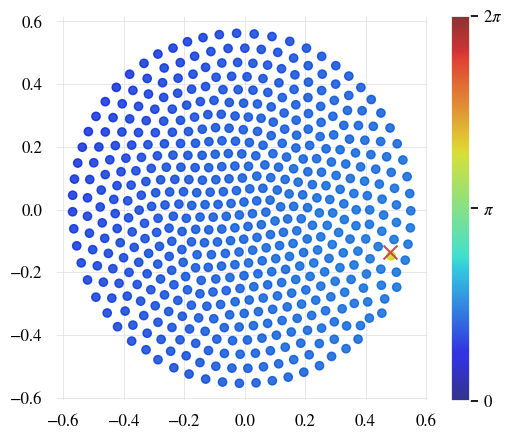

In [5]:
model.plot()

In [6]:
sa = StateAnalysis.calc_order_parameter_S(model)

0.08520048884779152

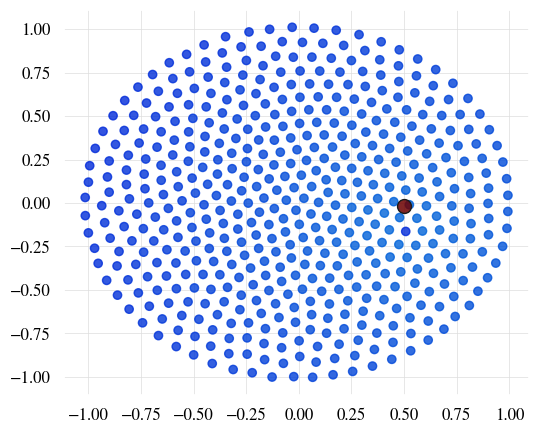

In [9]:
fig, ax = plt.subplots()
t = (model.counts) * model.dt
model.drivePosition = np.array([
    np.cos(model.driveThateVelocityOmega * t) * model.druveRadiusR,
    np.sin(model.driveThateVelocityOmega * t) * model.druveRadiusR
])
drivePhaseTheta = np.mod(model.driveThateVelocityOmega * t, 2 * np.pi)
ax.scatter(model.drivePosition[0], model.drivePosition[1], color=new_cmap(drivePhaseTheta), s=100, marker='o', edgecolors='k', zorder=10)
sc = ax.scatter(model.positionX[:, 0], model.positionX[:, 1],
            c=model.phaseTheta, cmap=new_cmap, alpha=0.8, vmin=0, vmax=2*np.pi)


In [8]:
model.phaseTheta

array([1.37457522, 1.20650143, 1.14651312, 1.30378901, 1.19094968,
       1.42781766, 1.21659617, 1.1458393 , 1.40270289, 1.4780379 ,
       1.18729364, 1.08046286, 1.20820552, 1.12445525, 1.29642009,
       1.38072123, 1.16708119, 1.1027642 , 1.36531189, 1.42820436,
       1.43373746, 1.27904828, 1.23600615, 1.44666525, 1.20195349,
       1.29444538, 1.28673949, 1.30263544, 1.2253773 , 1.12830419,
       1.29815423, 1.36370334, 1.28908625, 1.45447701, 1.2936232 ,
       1.26909568, 1.14308592, 1.36704128, 1.49567435, 1.17140108,
       1.29442635, 1.15613681, 1.32607496, 1.36559915, 1.26724721,
       1.39506363, 1.18019118, 1.32966577, 1.24506416, 1.21272149,
       1.36286005, 1.43352168, 1.26450032, 1.2033473 , 1.37663226,
       1.15620406, 1.27184633, 1.25976681, 1.39423005, 1.30713321,
       1.31345236, 1.24643839, 1.32226768, 1.32071912, 1.39351115,
       1.1690716 , 1.32248156, 1.1219565 , 1.16702315, 1.26174487,
       1.16364883, 1.32722622, 1.40227505, 1.34876046, 1.22228

In [4]:
K, H, G, P = model.K, model.H, model.G, model.P
dim = P.shape[0]
pointTheta = K * np.sum(H * G, axis=1) / dim + P
pointTheta

array([ 1.51151909,  1.6063224 ,  1.52940087,  1.6256577 ,  1.56366838,
        1.53433573,  1.52671025,  1.60257104,  1.49517536,  1.49113465,
        1.61251992, 58.21631768,  1.54215322,  1.54009605,  1.50310878,
        1.61017077,  1.54514678,  1.57942932,  1.50917565,  1.64722875,
        1.64881007,  1.50371633,  1.56201884,  1.48892475,  1.59563362,
        1.64207402,  1.57433142,  1.53551807,  1.53393898,  1.5536147 ,
        1.58061819,  1.50185156,  1.6428225 ,  1.53509217,  1.51803887,
        1.52598595,  1.59821058,  1.63338348,  1.48622821,  1.55251949,
        1.50544612,  1.61777694,  1.530224  ,  1.64612714,  1.57595005,
        1.51436224,  1.5419804 ,  1.59244706,  1.57695916,  1.572308  ,
        1.64302601,  1.51149263,  1.62742101,  1.62667622,  1.54966347,
        1.53566325,  1.64121942,  1.54096202,  1.50585225,  1.59405105,
        1.60879762,  1.50544976,  1.55786709,  1.54450389,  1.5610503 ,
        1.53907594,  1.50627899,  1.54346807,  1.62165524,  1.64

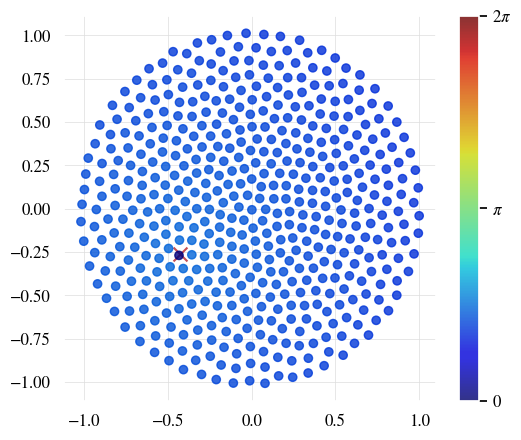

In [3]:
model.plot()

In [4]:
K, H, G, P = model.K, model.H, model.G, model.P
dim = P.shape[0]
pointTheta = K * np.sum(H * G, axis=1) / dim + P
# plt.scatter(range(model.agentsNum), pointTheta)
pointTheta

array([  1.62497054,   1.5217303 ,   1.58162354,   1.54485174,
         1.49277588,   1.60560765,   1.62256233,   1.51340486,
         1.62127044,   1.60579783,   1.52349561,   1.59565214,
         1.51771339,   1.5404009 ,   1.63426717,   1.55879199,
         1.51882288,   1.5026047 ,   1.62021668,   1.57953366,
         1.57427993,   1.6393307 ,   1.49127415,   1.61236545,
         1.5134301 ,   1.56569873,   1.51957748,   1.60345078,
         1.59446029,   1.50747647,   1.52808458,   1.6308646 ,
         1.55864646,   1.59575326,   1.64547614,   1.64567962,
         1.51141523,   1.57977356,   1.60015311,   1.4999318 ,
         1.64102264,   1.52445603,   1.6253718 ,   1.56548228,
         1.51246849,   1.6173458 ,   1.53126698,   1.54158944,
         1.50591967,   1.49925346,   1.56146655,   1.60849012,
         1.54037235,   1.53449687,   1.60605602,   1.56078236,
         1.55424479, 447.32392512,   1.62242802,   1.53561071,
         1.53953896,   1.64043506,   1.5476596 ,   1.58

In [75]:
model.update()

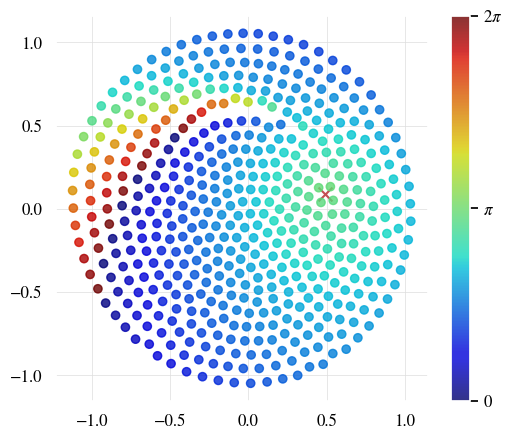

In [13]:
model.update()
model.plot()

In [31]:
self = model
t = self.counts * self.dt
drivePosition = np.array([
    self.druveRadiusR * np.cos(self.driveAngularVelocityW * t),
    self.druveRadiusR * np.sin(self.driveAngularVelocityW * t)
])
disance = self.distance_x(((self.positionX - drivePosition)[:, np.newaxis]))[:, 0]

self.F * np.cos(self.driveThateVelocityOmega * t - self.phaseTheta) / disance

array([-2.862671  , -0.70705091, -1.06546009,  1.87340636,  0.92589195,
        2.79690685, -0.46489665,  1.3884093 ,  2.92099348, -4.24265354,
        1.75952167,  2.09515747, -0.4672076 , -1.04881873, -1.86479801,
       -4.56002252,  1.19792741, -1.15933688, -2.01018806, -2.63172847,
       -0.64325454, -1.89874428,  1.60452717, -2.6328383 ,  0.49329616,
        2.15308258, -0.99131543, -2.33946156, -1.58264422,  1.3871799 ,
        0.62446035, -2.25404001,  2.06707769,  5.30497735, -0.61840758,
        1.83950945, -0.58089624,  3.90858935,  5.77274015,  1.16070068,
        1.01825477, -1.2874175 , -2.36718021,  1.86968349,  0.14023926,
        1.25994875, -0.35596724,  1.88729602, -1.80808292, -0.49383789,
       -2.81014465, -3.93700911,  1.75931953,  1.75725095,  1.45362897,
       -0.03498365,  1.47933938, -1.64892563, -0.42288623, -2.44011699,
        1.10016349, -0.4991247 ,  0.16551508,  1.57918351,  1.75826956,
       -1.41603725, -1.47744231, -1.13331206,  1.25177087,  0.65

In [27]:
sub = self.positionX - drivePosition
(sub[:, 0]**2 + sub[:, 1]**2) ** 0.5

array([0.60597573, 0.94828135, 1.6717104 , 0.67070329, 1.23574725,
       0.64663839, 1.3743695 , 1.42870778, 0.66761519, 0.47086469,
       1.08616476, 0.35460249, 1.1769874 , 1.56881141, 0.97378192,
       0.36673537, 1.31113975, 1.62669924, 0.99393258, 0.3204185 ,
       0.26080194, 1.01637724, 1.08363838, 0.50007303, 1.16546147,
       0.89160525, 0.80562327, 0.85258589, 1.25840484, 1.41031727,
       0.77019496, 0.75405169, 0.96551048, 0.37101313, 0.97372529,
       1.07367661, 1.48317543, 0.45805266, 0.32141275, 1.31791232,
       0.9541305 , 1.07979238, 0.78237592, 0.52064642, 0.91406076,
       0.58385965, 1.33220984, 0.66670286, 1.03086405, 1.1440448 ,
       0.56205176, 0.47324028, 0.72679284, 0.99651689, 0.80596553,
       1.60419984, 0.97120258, 1.11354833, 0.60765598, 0.69923038,
       0.66032977, 1.09324961, 0.71077209, 0.75291713, 0.51068119,
       1.39470808, 1.02292397, 1.48476256, 1.03746657, 1.09916332,
       1.32150261, 0.7947652 , 0.64457698, 0.52461621, 1.15581